# Graph Neural Networks Tutorial 

### By: [Christian Kragh Jespersen](https://astrockragh.github.io/) [<img src ="https://cdn-icons-png.flaticon.com/512/25/25231.png" alt="drawing" width="20" style="background-color: transparent"/>](https://github.com/astrockragh) [<img src="https://raw.githubusercontent.com/tlmakinen/FieldIMNNs/master/tutorial/plots/twitter-graphic.png" alt="drawing" width="20" style="background-color: transparent"/>](https://twitter.com/astrockragh?lang=en ""), Princeton University (e-mail: ckragh@princeton.edu)

## What we will be doing today

Mainly, I will be showcasing a lot of stuff, so that you are aware that they exist and that they are applicable to **your!** problems. 

### I want to open your eyes to the wonderful world of graphs!


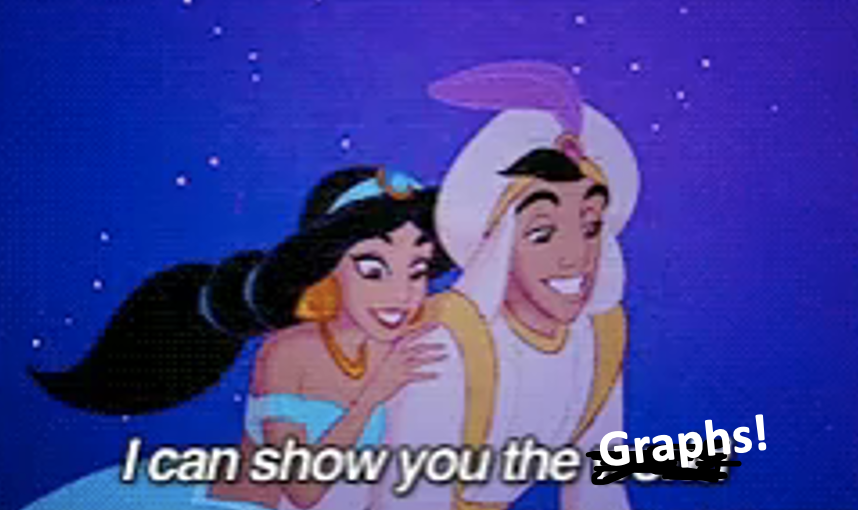

#### But of course we have to actually go into some details, so here's what we will do today.


### 1. Pytorch Geometric Framework
  - Learn how to set up a Graph Data object
  - Learn how to set up a Graph Neural Network to predict whether a given protein is an enzyme or not (Graph Classification)

    - Showcase the implementation of **GraphSAGE** (Hamilton et al, [Inductive Representation Learning on Large Graphs](https://arxiv.org/abs/1706.02216), NIPS 2017) and perhaps **GCN**.
  - Learn the basics of how to optimise a GNN (and win some swag!)

### 2. Node Classification
- Make a model that predicts if a given paper in a citation network is from a specific subfield and contrast the performance with a standard NN.

### 3. Edge Classification
- Make a model that predicts if a given paper in a citation network is from a specific subfield and contrast the performance with a standard NN

#### 4 [Optional] Outlier node detection

- Train a model to predict if a given paper in the citation network is an outlier and likely to be fake/from a predatory journal

# Let's get started!

## Setting up working environment

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

First we will do some imports and installs

In [3]:
# we're going to be using Pytorch, the most widely used framework for ML research right now.
# Pytorch is already installed so all we have to worry about is that everything else we do is compatible with our version of Pytorch
import torch
import os
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

1.13.1+cu116


And then we can get the Graph libraries installed.

In [4]:
#here we load the libraries needed for doing ML on graphs, pytorch geometric, and a little package that can help with making our training faster
!pip install torch-geometric \
  torch-sparse \
  torch-scatter \
  torch-cluster \
  -f https://pytorch-geometric.com/whl/torch-${TORCH}.html
!pip install accelerate
!pip install scikit-learn

## these are just for fun, in order to have some utils

!pip install -U -q git+https://github.com/deepmind/jraph.git #git+git://github.com/tlmakinen/jraph.git
!pip install -q "jraph[examples, ogb_examples] @ git+https://github.com/deepmind/jraph.git"
!pip install -U -q git+https://tlmakinen@bitbucket.org/tlmakinen/imnn.git@flax

!pip install -q flax==0.5.3 celluloid
!pip install -q jax-cosmo

# pull in repo data on cosmic Graphs
!git clone https://github.com/tlmakinen/cosmicGraphs.git
!unzip /content/cosmicGraphs/data/graphdata.zip
!unzip /content/cosmicGraphs/data/testgraphs.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 27.7 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=fc2f89b0a7b51b51ed219743a5a14507070855de40c912ada9c5decadb81d568
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c65378
Successfully built torch-geometric
  Attempting uninstall: psutil
    Found existing installation: psutil 5.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 13.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.0/202.0 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.3/217.3 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Pytorch Geometric Framework


#### Graph data representations in PyG
Given a *sparse* **Graph** $\mathcal{G}=(\mathbf{X}, (\mathbf{I}, \mathbf{E}))$ with **node features** $\mathbf{X} \in \mathbb{R}^{|V| \times F}$, **edge indices $\mathbf{I} \in \{1, \cdots, N\}^{2 \times |\mathcal{E}|}$**, (optional) **edge features** $\mathbf{E} \in \mathbb{R}^{|\mathcal{E} \times D|}$, it is described by an instance of class `torch_geometric.data.Data`, which holds the corresponding attributes.

We show a simple example of an unweighted and directed graph with four nodes and three edges.

<p align="center"><img width="70%" src="https://github.com/sw-gong/GNN-Tutorial/blob/master/figures/graph_data.png?raw=1"></p>

## The adjacecency matrix for this graph is: 

[[0, 0, 0, 0],\
[1, 0, 0, 0],\
[1, 0, 0, 0],\
[1, 0, 0, 0]]

Remember that for a given entry intro the adjacency matrix $a_{ij}$, the first index is the "sending" node, and the second is the "receiving" node.

We can rewrite this in sparse notation as [[1, 2, 3], [0, 0, 0]]

Let's write that as an actual PyTorch Geometric Data instance

In [5]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

edge_index = torch.tensor([[1, 2, 3], [0, 0, 0]], dtype=torch.long)
x_features = torch.randn((4,1)) # random entries, size = N_nodes, N_features, I'm only defining this because a Data instance has to have have node features

data = Data(edge_index=edge_index, x=x_features) #this is the miminum, can also input edge_attributes (edge_attr), targets (y), and positions (pos)
data, x_features

(Data(x=[4, 1], edge_index=[2, 3]), tensor([[ 0.8460],
         [-1.3699],
         [ 0.5337],
         [ 1.0469]]))

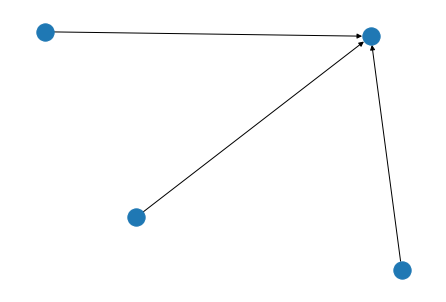

In [6]:
##We can visualize this graph with a library called networkx
import networkx as nx
from torch_geometric.utils import to_networkx
nxGraph = to_networkx(data)
nx.draw(nxGraph)

### Write down the adjacency matrix for the following graph representation of a tetrahedron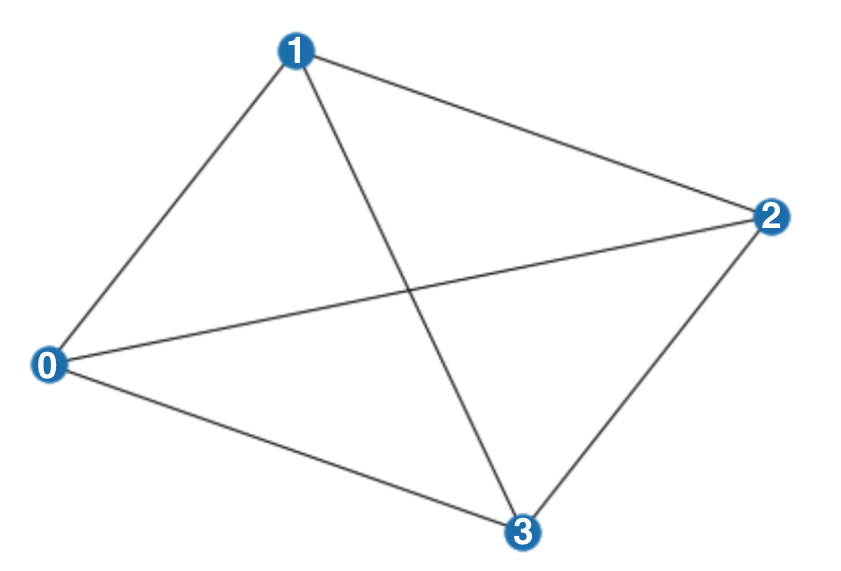

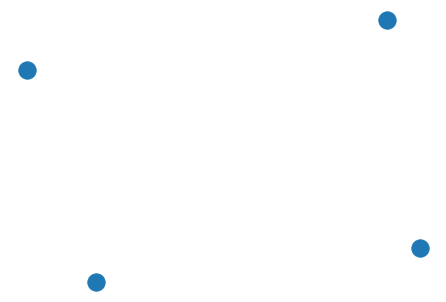

In [7]:
edge_index = torch.tensor([[], []], dtype=torch.long)
x_features = torch.randn((4,1)) # random entries

data = Data(edge_index=edge_index, x=x_features)

nxGraph = to_networkx(data)
nx.draw(nxGraph)

### We can also make a graph out of halos from the Quijote simulation pretty easily.

Here we don't natively know the adjacency matrix, so we have to make it up.

We'll just choose a linking length, and then link every halo to every other halo within that distance.

Q: Why is this a natural choice? Would it make sense to get the GNN to learn it?

In [8]:
#@title Defining some helpful functions
#importing stuff [run me]
import jax.random as jrnd
from functools import partial
import scipy.spatial as SS

import numpy as onp

from functools import partial
import jax
import jax.random as jrnd
import jax.numpy as jnp
import jraph
from scipy.sparse import csgraph
import numpy as np
import os, sys
from struct import unpack

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import cloudpickle as pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)
        
def load_obj(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

#####################


def get_distances(X):
    nx = X.shape[0]
    return (X[:, None, :] - X[None, :, :])[jnp.tril_indices(nx, k=-1)]


def get_receivers_senders(nx, dists, connect_radius=0.15):
    '''connect nodes within `connect_radius` units'''
    
    senders,receivers = jnp.tril_indices(nx, k=-1)
    dists = dists[jnp.tril_indices(nx, k=-1)]
    mask = dists < connect_radius
    # pad dummy s,r with n_node
    senders = jnp.where(mask > 0, senders, nx)
    receivers = jnp.where(mask > 0, receivers, nx)
    dists = jnp.where(mask > 0, dists, 0.)
    return senders, receivers, dists

def l2norm_einsum(X, eps=1e-9):
    """calculaute eucl distance with einsum"""
    a_min_b = X[:, None, :] - X[None, :, :]
    norm_sq = jnp.einsum("ijk,ijk->ij", a_min_b, a_min_b)
    return jnp.where(norm_sq < eps, 0, jnp.sqrt(norm_sq))

def get_r2(X):
    """calculate euclidean distance from positional information"""
    nx = X.shape[0]
    #alldists = l2norm(X[:, None, :] - X[None, :, :])
    alldists = l2norm_einsum(X)
    return alldists #[jnp.tril_indices(nx, k=-1)]


##### GET EDGES #####
def edge_builder(pos, r_connect, n_node=None, invert_edges=True,
                     boxsize=1.0001, leafsize=16):
    
    if n_node is not None:
        pos = pos[:n_node]
    
    else:
      n_node = pos.shape[0]

    r_connect = r_connect #simulator_args["connect_radius"] / simulator_args["L"]

    # mask out halos with distances < connect_radius
    dists = get_r2(pos)
    
    _receivers, _senders, dists = get_receivers_senders(n_node, 
                                                        dists, 
                                                        connect_radius=r_connect)

    diff = pos[_senders] - pos[_receivers]

    num_pairs = dists.shape[0]
    row = _senders
    col = _receivers
    
    # Distance
    dist = dists
    
    # Centroid of galaxy catalogue
    centroid = jnp.mean(pos,axis=0)
    
    # Unit vectors of node, neighbor and difference vector
    unitrow = (pos[row]-centroid)/jnp.linalg.norm((pos[row]-centroid), axis=1).reshape(-1,1)
    unitcol = (pos[col]-centroid)/jnp.linalg.norm((pos[col]-centroid), axis=1).reshape(-1,1)
    
    unitdiff = jnp.where((dist.reshape(-1,1) > 0.), diff/dist.reshape(-1,1), 1.)
    
    # Dot products between unit vectors
    cos1 = jnp.einsum('ij,ij->i', unitrow, unitcol)
    cos2 = jnp.einsum('ij,ij->i', unitrow, unitdiff)

    # mask out nans
    cos1 = jnp.where(dist == 0., 0., cos1)
    cos2 = jnp.where(dist == 0., 0., cos2)
    
    if invert_edges:
        # flip the distance
        dist = jnp.where((dist > 0.), 1. / (dist*r_connect*100.), dist)
        # sort edges from biggest to smallest
        idx = jnp.argsort(dist)[::-1]
        dist = jnp.sort(dist)[::-1]
    
    else:
        # Normalize distance by linking radius
        dist /= r_connect
        # pad with large dummy edge
        mask = (dist > 0.)
        fillval = 100.
        dist = jnp.where(mask < 1, fillval, dist)
        
        # sort edges from SMALLEST to BIGGEST
        idx = jnp.argsort(dist) #[::-1]
        dist = jnp.sort(dist) #[::-1]
        
        # replace all dummy distances with zeros again
        dist = jnp.where(dist == fillval, 0., dist)



    cos1 = cos1[idx]
    cos2 = cos2[idx]

    _senders = _senders[idx]
    _receivers = _receivers[idx]

    edge_attr = jnp.concatenate([dist.reshape(-1,1), cos1.reshape(-1,1), cos2.reshape(-1,1)], axis=1)
    
    return edge_attr, jnp.array(_senders), jnp.array(_receivers)




##### GET GRAPH PADDING #####

def padded_graph_builder(catalog, θ, simulator_args, r_connect=None, n_node=None):
      
    pad_nodes_to = simulator_args['pad_nodes_to']
    pad_edges_to = simulator_args['pad_edges_to']
    include_pos = simulator_args["include_pos"]
    node_features = simulator_args["node_features"]

    # get empty arrays
    if include_pos:
        nodes = jnp.zeros((pad_nodes_to, node_features))
        edges = jnp.zeros((pad_edges_to, 1)) # dist

    else:
        nodes = jnp.zeros((pad_nodes_to, 4)) # density, neighborhood info
        edges = jnp.zeros((pad_edges_to, 3)) # dist, angle, angle
    
    senders = (jnp.ones((pad_edges_to), dtype=int)*pad_nodes_to).astype(int)
    receivers = (jnp.ones((pad_edges_to), dtype=int)*pad_nodes_to).astype(int)
    
    
    # dealing with the padded catalog
    # set the dummy nodes' positions to way outside the box
    catalog = jnp.where((catalog[:, 0] == 0.)[:, jnp.newaxis],
                        jnp.array([0., 0., 0., 0., 100., 100., 100.]),
                        catalog)
    
    # unpack node attributes from catalog
    pos = catalog[:, 4:]
    
    # reset dummy positions to zero after passing to pos
    catalog = jnp.where((catalog[:, 0] > 0.)[:, jnp.newaxis], catalog, 0.)
    
    if include_pos:
        node_attr = catalog[:, :]

    else:
        node_attr = catalog[:, :4]
      
    n_node = jnp.sum(node_attr[:, 0] > 0.)
    
    # GET EDGE INFORMATION
    edge_attr, _s, _r = edge_builder(jnp.array(pos), r_connect=r_connect,
                                     invert_edges=simulator_args["invert_edges"],
                                     boxsize=1.0001)
    
    if include_pos:
        edge_attr = edge_attr[:, :1]
    
    n_edge = jnp.sum(edge_attr[:, 0] > 0.)
    
    # fill in jax arrays
    
    # edge information
    edges = edges.at[:pad_edges_to, :].set(edge_attr[:pad_edges_to, :])
    senders = senders.at[:pad_edges_to].set(_s[:pad_edges_to])
    receivers = receivers.at[:pad_edges_to].set(_r[:pad_edges_to])

    # add in node information
    nodes = nodes.at[:pad_nodes_to, :].set(node_attr[:pad_nodes_to])

    if simulator_args["squeeze"]:

        graph = jraph.GraphsTuple(nodes=jnp.squeeze(nodes), edges=jnp.squeeze(edges),
                              senders=jnp.squeeze(senders), receivers=jnp.squeeze(receivers),
                              n_node=jnp.array([n_node]), n_edge=jnp.array([n_edge]), globals=jnp.array([θ])
                              )
        return graph

    else:
        graph = jraph.GraphsTuple(nodes=nodes, edges=edges,
                                senders=senders, receivers=receivers,
                                n_node=jnp.array([n_node]), n_edge=jnp.array([n_edge]), globals=jnp.array([θ])
                                )
        return graph


####################### VISUALIZE GRAPH #######################

def plot_graph(graph,
                ax=None,
                nodesize=45,
                nodealpha=0.5,
                edgewidth=1.5,
                edgealpha=0.5,
                labelaxes=False,
                removeticks=False,
                removebox=False):
    """visualize jraph graph using Networkx"""
    
    send_receive = [(int(graph.senders[l]), int(graph.receivers[l])) for l in range(len(graph.receivers))]
    
    G = nx.Graph()
    G.add_nodes_from(list(np.arange(graph.nodes[:, :1].shape[0])))
    G.add_edges_from(send_receive)


    # 3d spring layout
    pos = graph.nodes[:, 1:4] #X 
    
    masses = graph.nodes[:, 0]
    
    
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])
    
    if ax is None:
            # Create the 3D figure
        fig = plt.figure(figsize=(7,4))
        ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    sc = ax.scatter(*node_xyz.T, s=nodesize, ec='w', 
                    c=masses, cmap='gist_gray', alpha=nodealpha)



    # Plot the edges
    for vizedge in edge_xyz:
        ax.plot(*vizedge.T, color="tab:gray", lw=edgewidth, alpha=edgealpha)


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        if removeticks:
            for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
                dim.set_ticks([])
                
        if removebox:
            for key, spine in ax.spines.items():
                spine.set_visible(False)
            ax.axis('off')
        if labelaxes:
            # Set axes labels
            ax.set_xlabel(r"$x\ \rm [Mpc/h]$", fontsize=15)
            ax.set_ylabel(r"$y$", fontsize=15)
            ax.set_zlabel(r"$z$", fontsize=15)


    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')


    ax.view_init(azim=15, elev=20)
    _format_axes(ax)  
    #plt.show()
    
    return ax

def load_single_unpadded_graph(fname, idx, masscut, r_connect):
  _graph = load_obj(fname)
  catalog = _graph.nodes[idx] # take first simulation
  catalog = catalog[catalog[:, 0] > masscut] # remove padding, with masscut

  pos = catalog[:, 4:]

  catalog = jnp.concatenate([catalog[:, :1], catalog[:, 4:]], axis=-1)

  edge_attr, _s, _r = edge_builder(jnp.array(pos), r_connect=r_connect,
                                  invert_edges=simulator_args["invert_edges"],
                                  boxsize=1.0001)
  
  edgemask = edge_attr[:, 0] > 0
  edge_attr = edge_attr[edgemask, 0]
  _s = _s[edgemask]
  _r = _r[edgemask]

  return jraph.GraphsTuple(nodes=catalog,
                           edges=edge_attr,
                           senders=_s,
                           receivers=_r,
                           n_node=_graph.n_node[idx],
                           n_edge=_graph.n_edge[idx],
                           globals=_graph.globals[idx])

# default simulator args
N=512
shape=(N,N,N)
simulator_args = dict(
        connect_radius=0.2,
        mass_cut=1.5,             # 10^15 Msun
        do_noise=False,
        nbar=0.0015,    # GIVES US A LOT MORE NODES
        pad_nodes_to=200,
        pad_edges_to= 500, # 1150, 500, 100 for 0.3, 0.2, 0.1
        include_pos=False,
        invert_edges=False,
        squeeze=False,
        boxsize=None, # or 1.0001
        return_cat=False,
        node_features=7)

Here we will load in a given version of the Quijote catalogue and try to visualize what the graph would look like.

<Figure size 864x864 with 0 Axes>

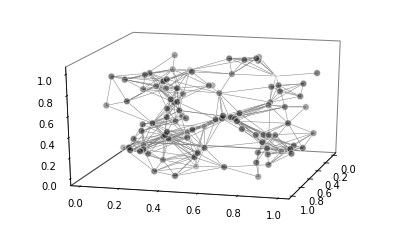

In [9]:
fiducial_graphs = load_obj('./graphdata/fid_mcut_1.1.pkl')
catalog = fiducial_graphs.nodes[0] # take the first simulation in the batch

catalog = catalog[catalog[:, 0] > 0] # remove padding

# define two mass cuts
lowmass_cut = 1.1  # in units of 10^15 M_sun. This mass cut selects all data in the file
mass_cut = 1.5 # in units of 10^15 M_sun. This is the mass cut used in the training below


# load two unpadded graphs using the pre-defined helper modules and make a graph with M>mass_cut [10^15 M_sun] and a linking length of r_connect [Gpc]

small_graph = load_single_unpadded_graph('./graphdata/fid_mcut_1.1.pkl', 0, masscut=mass_cut, r_connect=0.3) # so only very large halos 
# small_graph = load_single_unpadded_graph('./graphdata/fid_mcut_1.1.pkl', 0, masscut=mass_cut, r_connect = 1) # connects everything to everything else (the box size is one Gpc) 

# big_graph = load_single_unpadded_graph('./graphdata/fid_mcut_1.1.pkl', 0, masscut=lowmass_cut, r_connect=0.2) #including slightly smaller halos

# plot graphs (this might take a minute)
fig = plt.figure(figsize = (12,12))
ax = plot_graph(small_graph, nodesize=45, edgewidth=0.5, edgealpha=1.0)
# ax = plot_graph(big_graph, ax = ax, nodesize=10, edgewidth=0.5, nodealpha=0.1, edgealpha=0.2)

### Batching Graphs (and why sparse notation for Adjacency matrices is very important)
Neural networks are usually trained in a batch-wise fashion. Minibatch graphs can be efficiently dealt with to achieve parallelization over a mini-batch from creating sparse block diagnoal adjacency matrices and concatenating features and target matrices in the node dimension. 

One can think of this as creating one giant graph with multiple disjoint subgraphs.

PyTorch Geometric does this automatically.


<p align="center"><img width="70%" src="https://github.com/sw-gong/GNN-Tutorial/blob/master/figures/mini_batch_graph.png?raw=1"></p>

# Our first GNN

Now we're ready to build our first GNN, and apply it to a classic protein classification problem.

The dataset is a small (~1000) set of proteins. Nodes represent the amino acids and two nodes are connected by an edge if they are less than 6 Ångstroms apart. The node features are binary identifiers of if a given amino acid belongs to a specific group of amino acids (essential, nonessential and conditional).


The goal is to predict if a given protein functions as an enzyme.


### Let's import the data and visualize some graphs

In [10]:
from torch_geometric.datasets import TUDataset, QM7b, MoleculeNet
dataset = TUDataset(root= './temp', use_node_attr = True, pre_transform = None, name = "PROTEINS")
# dataset = QM7b(root= './temp')
# dataset = MoleculeNet(root= './temp', name = "ToxCast")

Extracting temp/PROTEINS/PROTEINS.zip
Processing...
Done!


Data(edge_index=[2, 214], x=[50, 4], y=[1])

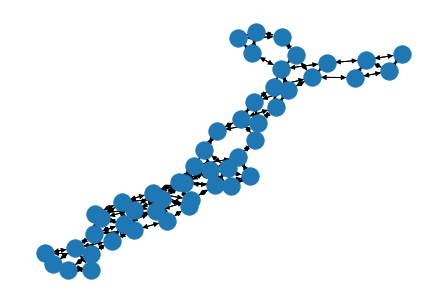

In [11]:
# Let's check out a single protein
single_protein = dataset[100]
nxGraph = to_networkx(single_protein)

#there are many possible layouts, feel free to dry out different ones 
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html

nx.draw(nxGraph, pos=nx.kamada_kawai_layout(nxGraph))  

single_protein


## Setting up the GNN

We need three things to do this graph classification task: 

### 1. Message-Passing/Convolution: 

  #### GraphSAGE (SAGEConv)

  As the default, we will choose the GraphSAGE layer, one of the more popular layers.

  The algorithm of GraphSAGE (*Inductive Representation Learning on Large Graphs (NIPS 2017)*) embedding generation is usually written as:

  $$\mathbf{x}_i^{\prime}=\mathbf{W}_1 \mathbf{x}_i+\mathbf{W}_2 \cdot \operatorname{mean}_{j \in \mathcal{N}(i)} \mathbf{x}_j$$

  Which I love because it is easily interpretable as a **node function** separated from a **neighborhood function**.

  As discussed, the aggregation function is easy to change, and as long as it's permutation invariant, anything goes. Later on, we will try changing our GNN so that SAGEConv uses aggr = 'max' or 'sum'.

  #### GCN (GCNConv)

  I will also include a possibility of changing the convolutional layer to a different layer, called **GCNConv**, defined by:

  $$X' = \tilde{A}X W$$

  Where 
$$\tilde{A}$$ is a "normalized" adjacency matrix and
$$W$$

  is a learnable weight matrix.

  Because this layer only has a single weight matrix, we can think about the node function and neighborhood function being shared, i.e. this will be good for systems where the nodes and the neighboring nodes effectively represent the same thing.

  #### Think well about which one to use in a given situation!

### 2. An global pooling function.
  
  This also has to be permutationally invariant, so sum/mean/max are also good choices here.

### 3. A decoder function:

  This is usually just a normal MLP, nothing fancy (but there are tricks to make especially multi-target learning more efficient).

In [12]:
import torch
import torch.nn.functional as F

from torch.nn import Dropout, Linear, ReLU, Softmax, ModuleList, LeakyReLU
from torch_geometric.nn import global_mean_pool, global_add_pool, global_max_pool
from torch_geometric.nn.conv import SAGEConv, GCNConv

class SageNet(torch.nn.Module):

    def __init__(self, n_convs = 3, n_decode = 3, hidden_states = 256, GCN = False, n_features = 3, n_classes = 2, aggregator = 'mean', pooling_operator = 'mean'):
        super(SageNet, self).__init__()

        ##### Here we define some basic attributes
        self.n_features = n_features
        self.n_classes = n_classes

        ##### Here we define the activation function for later use
        self.activation = ReLU()
        # self.activation = LeakyReLU()

        ##### Here we define the graph convolutions
        ### This is where the magic happens
        self.convolutions = ModuleList()                            # This is the neighborhood
                                                                    # aggregation function
        self.convolutions.append(SAGEConv(n_features, hidden_states, aggr = aggregator))
        for _ in range(n_convs-1):
          self.convolutions.append(SAGEConv(hidden_states, hidden_states, aggr = aggregator))

        # Same, but if you want to use the GCNConv
        if GCN:
          self.convolutions = ModuleList()    
          self.convolutions.append(GCNConv(n_features, hidden_states))
          for _ in range(n_convs-1):
            self.convolutions.append(GCNConv(hidden_states, hidden_states))
        
        # Define the global pooling operator
        if pooling_operator == 'mean':
          self.pool = global_mean_pool
        if pooling_operator == 'sum':
          self.pool = global_add_pool
        if pooling_operator == 'max':
          self.pool = global_max_pool

        # Define the decoder
        self.decode = ModuleList()
        for _ in range(n_decode-1):
          self.decode.append(Linear(3+hidden_states, hidden_states))
        self.decode.append(Linear(hidden_states, n_classes))

        #scale the outputs to make sense as class probabilities
        self.final = Softmax(dim=1)

    # here we do the forward pass
    def forward(self, graph_data):

        # take in data
        x, edge_index, batch = graph_data.x, graph_data.edge_index,\
                    graph_data.batch

        # Switch Between Convolutions and Activations
        x1 = global_add_pool(x, batch)

        for conv in self.convolutions:
            x = conv(x, edge_index)
            x = self.activation(x)
        
        # sum over the batch
        x = self.pool(x, batch)
        x = torch.hstack([x,x1])
        # decode with MLP
        for decoder in self.decode:
          x = decoder(x)
          x = self.activation(x)

        # scale with Softmax
        x_out = self.final(x)
        
        return x_out

In [13]:
#@title SumNet
class SumNet(torch.nn.Module):

    def __init__(self, n_convs = 3, n_decode = 3, hidden_states = 256, GCN = False, n_features = 3, n_classes = 2, aggregator = 'mean', pooling_operator = 'mean'):
        super(SumNet, self).__init__()

        ##### Here we define some basic attributes
        self.n_features = n_features
        self.n_classes = n_classes
        
        self.activation = ReLU()

        # Define the global pooling operator
        if pooling_operator == 'mean':
          self.pool = global_mean_pool
        if pooling_operator == 'sum':
          self.pool = global_add_pool
        if pooling_operator == 'max':
          self.pool = global_max_pool

        # Define the decoder
        self.decode = ModuleList()
        for _ in range(n_decode-1):
          self.decode.append(Linear(n_features, hidden_states))
        self.decode.append(Linear(hidden_states, n_classes))

        #scale the outputs to make sense as class probabilities
        self.final = Softmax(dim=1)

    # here we do the forward pass
    def forward(self, graph_data):

        # take in data
        x, edge_index, batch = graph_data.x, graph_data.edge_index,\
                    graph_data.batch
        
        # sum over the batch
        x = self.pool(x, batch)

        # decode with MLP
        for decoder in self.decode:
          x = decoder(x)
          x = self.activation(x)

        # scale with Softmax
        x_out = self.final(x)
        
        return x_out

Here we set up the training loop. There's no need for you to do this so this code block is hidden

In [14]:
#@title Setting up training loop
from tqdm.notebook import tqdm
import numpy as np
from torch.optim.lr_scheduler import CosineAnnealingLR, OneCycleLR
from accelerate import Accelerator
accelerator = Accelerator()
device = accelerator.device

def train_model(model, batch_size = 128, learning_rate =1e-3, n_epochs=1000, verbose=True, weight_decay = 1e-4, test = False):
  

  ### do not change the seed!

  seed = 123
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  np.random.seed(seed)

  dataset = TUDataset(root= './temp', name = "PROTEINS")

  num_samples = len(dataset)
  num_val = num_samples // 10

  idx = np.arange(num_samples)
  train_idx = np.random.choice(idx, size = num_samples-2*num_val, replace = False)
  testval_idx = idx[~np.isin(idx, train_idx)]
  test_idx = testval_idx[::2]
  val_idx = testval_idx[1::2]

  print(len(train_idx), len(test_idx), len(val_idx))

  val_dataset = dataset[val_idx]
  test_dataset = dataset[test_idx]
  train_dataset = dataset[train_idx]

  train_loader = DataLoader(train_dataset, batch_size=batch_size)
  test_loader = DataLoader(test_dataset, batch_size=batch_size)
  val_loader = DataLoader(val_dataset, batch_size=batch_size)


  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = weight_decay)
  scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs*len(train_loader))
  scheduler = OneCycleLR(optimizer, max_lr = learning_rate*5, total_steps=n_epochs*len(train_loader))


  _, _, test_loader = accelerator.prepare(model, optimizer, test_loader)
  _, _, val_loader = accelerator.prepare(model, optimizer, val_loader)
  model, optimizer, train_loader = accelerator.prepare(model, optimizer, train_loader)
  
    # define our metric

  def evaluate(model, loader):

    # get val accuracy score

    num_correct = 0.
    num_total = 0.

    model.eval()
    total_loss = 0
    total_batches = 0

    for data in loader:

        pred = model(data)

        loss = F.cross_entropy(pred, data.y)

        num_correct += (pred.argmax(dim=1) == data.y).sum()
        num_total += pred.shape[0]

        total_loss += loss.detach()
        total_batches += data.batch.max()

    loss = total_loss / total_batches
    accuracy = num_correct / num_total

    model.train()

    return loss, accuracy 

  val_acc = []
  train_acc = []

  for epoch in tqdm(range(n_epochs), position = 0, leave = True):
    if epoch==0:
      print('Training!')
    model.train()
    return_loss=0

    for data in train_loader: 

        predictions = model(data)
        loss = F.cross_entropy(predictions, data.y)
        accelerator.backward(loss)
        optimizer.step() 
        optimizer.zero_grad()
        scheduler.step(epoch)
        return_loss += loss
    if (epoch+1)%100==0 or (epoch+1)==n_epochs or epoch == 0:

      if verbose:
        val_loss, val_accuracy = evaluate(model, val_loader)
        train_loss, train_accuracy = evaluate(model, train_loader)
        
        print(f'Epoch {epoch+1}:')

        print(f'Training cross-entropy: {train_loss*1e3:.2f} - accuracy: {train_accuracy:.2f} ::: Validation cross-entropy: {val_loss*1e3:.2f} - accuracy: {val_accuracy:.2f}')

      else:
        print(f' Cross-Entropy at epoch {epoch+1} is {return_loss:.2f}')

  if test:
    _, test_acc = evaluate(model, test_loader)
    print(f'Test accuracy {test_acc:.2f}')

  return predictions

## Benchmarking

In [1]:
# Model = SumNet(n_decode = 2, hidden_states = 8, pooling_operator = 'mean')
# preds = train_model(Model, learning_rate = 4e-3, weight_decay = 1e-5, n_epochs = 500)

Let's try it out!

In [2]:
# Model = SageNet(n_convs = 2, n_decode = 2, hidden_states = 3, aggregator = 'sum', pooling_operator = 'sum')
# preds = train_model(Model, learning_rate = 4e-3, weight_decay = 1e-5, n_epochs = 500)

So that kinda works, but not that well. 

We're going to take a little break, and do a tiny competition. Turn to the person to your side, and in teams of two, let's see which team can get the best test accuracy!

Conditions are: 
- Max 500 training epochs
- Has to use the same train/val/test split as before

Hyperparameters that can be changed:

For learning:

- learning_rate : multiplier for weight derivatives (how fast the network learns per epoch)
- weight_decay (L2 regularization)

For the Net:

- GCN : Whether or not to use the GCNConv or SAGEConv layer 
- n_convs : number of conv layers
- n_decode : number of decoder layer
- hidden_states : the width of the network 
- pooling_operator : which function to use to pool the features of all the nodes in the graph

if using SAGEConv (GCN = False)

- aggr : which function to use to aggregate neighborhood information

Prizes include several items of Princeton Swag!

In [3]:
# ##we could try making a very wide network? Think, what does that "tell" the network?
# Model = SageNet(n_convs = 2, n_decode = 2, hidden_states = 32, GCN = False, pooling_operator = 'max')
# preds = train_model(Model, learning_rate = 1e-3, weight_decay = 1e-5 , n_epochs = 500)

## But now it's your turn (15 minutes) 

### Pizza Cutter and T-shirt on the line!

In [79]:
Model = SageNet(n_convs = int, n_decode = int, hidden_states = int, GCN = bool, aggregator = str, pooling_operator = str)
preds = train_model(Model, learning_rate = float, weight_decay = float, n_epochs = 500)

# Switching datasets and task objectives

The **Cora** dataset is a citation network, which contains 2708 papers (nodes) with edges connecting a paper that cites another paper to that paper.

The papers are categorised into 7 classes, different subfields of Machine Learning and the goal is to predict which of these subfields each paper belongs to.

The feature vectors consist of 0's and 1's depending on if the paper contains a specific word (out of 1433).

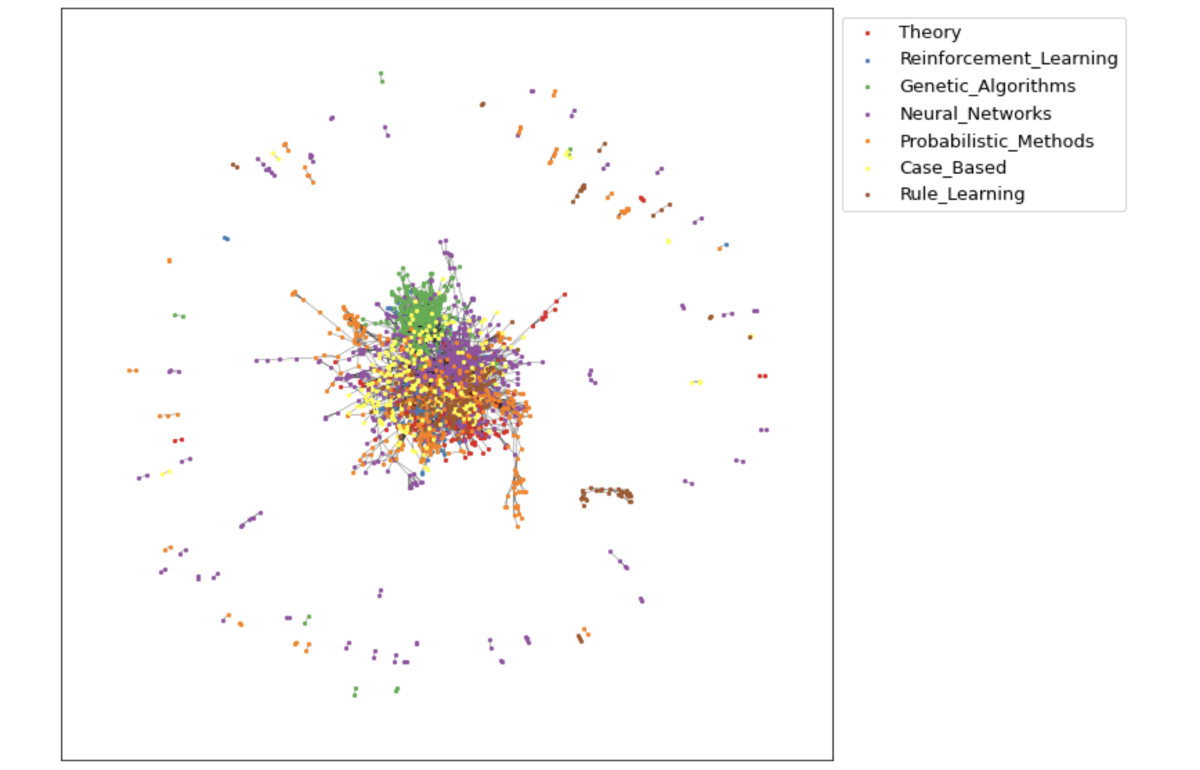

##### There are two basic tasks that this standard dataset is used for:

### 1. Node Classification, i.e. given the graph, predict which class each node belongs to. For astrophysicists, a possible example here would be classification of galaxies (Spiral/Ellipticals) in the cosmic web (nobody has actually done this yet so if you want to do it let me know and I'd love to be a part of it).
### 2. Edge Classification, i.e. given the nodes and some of the edges, determine whether edges exist between the rest of the nodes.

##### We'll go through both now, but focus on 1. since 2. is less common in astrophysics

## Node Classification

First we import the dataset. 

This time all of the data is contained in the same large graph, **even though** there are subgraphs that are not connected to anything else. 

For graphs this is completely fine, it changes nothing.

In [80]:
#@title downloading the dataset
from torch_geometric.datasets import Planetoid
import networkx as nx

dataset = Planetoid(root='/temp/Cora', name='Cora')
graph = dataset[0]
graph

Processing...
Done!


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

The graph already has training/validation/test sets assigned, but I include this block of code below in case somebody wants to know how to do a good train/val/test split on any PyTorch graph.

For the sake of reproducibility we will use the pre-assigned labels

In [81]:
##uncomment to shuffle and get new train/val/test

# import torch_geometric.transforms as T
# split = T.RandomNodeSplit(num_val=0.1, num_test=0.2)
# graph = split(graph)

## Benchmarking:

First we want to ask whether the GNN that we will end up making is actually better than a simple MLP. This is always good practice to do, and something that many (!!!) people (re: astronomers/physicists) forget!

This classification will be based solely on the keyword feature vectors.

Let's define a simple MLP and train+test it!

In [82]:
from torch.nn import Sequential, Module, CrossEntropyLoss

class MLP(Module):
    def __init__(self, hidden_states = 64):
        super(MLP, self).__init__()
        self.layers = Sequential(
        Linear(dataset.num_node_features, hidden_states),
        ReLU(),
        Linear(hidden_states, hidden_states//2),
        ReLU(),
        Linear(hidden_states//2, dataset.num_classes)
        )

    def forward(self, data):
        x = data.x  # only using node features (x)
        output = self.layers(x)
        return output


def train_node_classifier(model, graph, optimizer, criterion, n_epochs=200, print_epoch = 10):

    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(graph)
        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
        loss.backward()
        optimizer.step()

        pred = out.argmax(dim=1)
        acc = eval_node_classifier(model, graph, graph.val_mask)

        if epoch % print_epoch == 0 or epoch==1:
            print(f'Epoch: {epoch:03d}, Train Loss: {100*loss:.3f}, Val Acc: {acc:.3f}')

    return model


def eval_node_classifier(model, graph, mask):

    model.eval()
    pred = model(graph).argmax(dim=1)
    correct = (pred[mask] == graph.y[mask]).sum()
    acc = int(correct) / int(mask.sum())

    return acc
  
  
mlp = MLP(hidden_states = 256)
optimizer_mlp = torch.optim.Adam(mlp.parameters(), lr=0.01, weight_decay=5e-4)
criterion = CrossEntropyLoss()
mlp = train_node_classifier(mlp, graph, optimizer_mlp, criterion, n_epochs = 200, print_epoch = 20)

test_acc = eval_node_classifier(mlp, graph, graph.test_mask)
print(f'Test Acc: {test_acc:.3f}')

Epoch: 001, Train Loss: 194.873, Val Acc: 0.298
Epoch: 020, Train Loss: 0.004, Val Acc: 0.404
Epoch: 040, Train Loss: 0.010, Val Acc: 0.478
Epoch: 060, Train Loss: 0.150, Val Acc: 0.538
Epoch: 080, Train Loss: 0.199, Val Acc: 0.544
Epoch: 100, Train Loss: 0.181, Val Acc: 0.542
Epoch: 120, Train Loss: 0.172, Val Acc: 0.536
Epoch: 140, Train Loss: 0.171, Val Acc: 0.536
Epoch: 160, Train Loss: 0.170, Val Acc: 0.534
Epoch: 180, Train Loss: 0.169, Val Acc: 0.534
Epoch: 200, Train Loss: 0.169, Val Acc: 0.536
Test Acc: 0.566


##### Alright this isn't great, but it's better than random 🤨

__________________



## GNNs to the rescue!

 So now we will exploit the full structure of the problem, and get an example where the GCN layer is appropriate

Q: Why do you think the GCN layer works well for this

So here's a simple GCN network that we can use to try some stuff out.

[live_code] Let's put in two convolutional layers and a single relu activation, about as vanilla as can be, and see of we can beat this approximately 0.55 accuracy.

Q: Here we don't need a pooling function, why?

In [84]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_states = 32, n_features = dataset.num_node_features, n_classes = dataset.num_classes):
        super().__init__()
        
        #### Let's live code so this will probably go wrong!
        

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        output = self.conv2(x, edge_index)

        return output

    
    
gcn = GCN(hidden_states = 32)
optimizer_gcn = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=1e-3)
gcn = train_node_classifier(gcn, graph, optimizer_gcn, criterion)

test_acc = eval_node_classifier(gcn, graph, graph.test_mask)
print(f'Test Acc: {test_acc:.3f}')

#### The SOTA up until 2016 was a test accuracy of 0.76 so this is pretty alright!

Here we can also do the exact same thing but with SAGEConv, which generally is a bit more expressive (and a bit slower), but in this case there isn't much of a difference. You can also add in a third convolutional layer, or maybe even a linear layer!

Try implementing it yourself!

In [ ]:
# Optional to run, is a bit slower than GCN
# class NodeSage(torch.nn.Module):
#     def __init__(self, hidden_states = 32):
#         super(NodeSage, self).__init__()
#         ---------------------------------------------
#         ----            YOUR CODE HERE           ----
#         ---------------------------------------------

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index

#         x = self.conv1(x, edge_index)
#         x = F.relu(x)
#         output = self.conv2(x, edge_index)

#         return output 

    
    
# gcn = NodeSage(hidden_states = 32)
# optimizer_gcn = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=1e-3)
# gcn = train_node_classifier(gcn, graph, optimizer_gcn, criterion, n_epochs=200)

# test_acc = eval_node_classifier(gcn, graph, graph.test_mask)
# print(f'Test Acc: {test_acc:.3f}')

# Edge/Vertex Classification

Now that we managed to do the node classification pretty well, let's see if we can predict whether or not two papers are connected by a citation! For astrophysics, a good edge prediction question could be: "Is that galaxy part of that rich cluster?" or "Will a given pair of observed galaxies merge later in their life?"

This is mainly a demonstration, so I will not go as much in depth with exactly what's going on - there are a few concepts that I would however like to highlight.

### Negative Sampling:

In order to efficiently train GNNs to classify whether or not a given edge link exist, we need to also include edges in our training set, that do not actually exist, which drastically enhances the amount of training data that we have! Some people forget to do this and then complain that GNNs are useless, don't be like that!

An illustration of positive and negative links can be seen below.

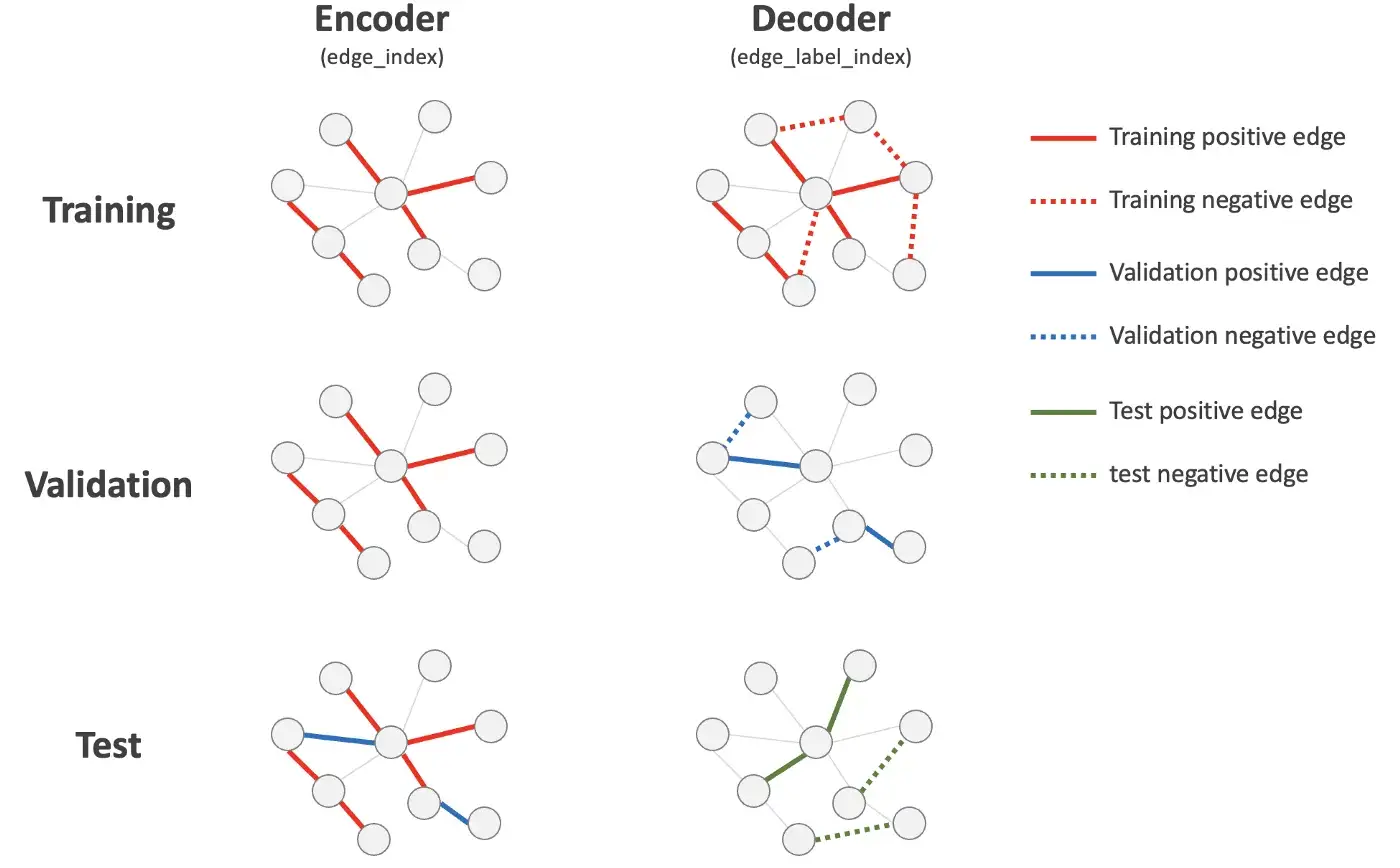

In [91]:
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import negative_sampling

class EdgeNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(EdgeNet, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

        # self.conv1 = SAGEConv(in_channels, hidden_channels, aggr = 'max')
        # self.conv2 = SAGEConv(hidden_channels, out_channels, aggr = 'max')

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

  #############       THIS IS WHERE THE MAGIC HAPPENS        ############
  #### Take a product of the node encoding to predict edge existence ####
    def decode(self, z, edge_label_index):                              #
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(   #
            dim=-1                                                      #
        )  # product of a pair of nodes on each edge                    #
                                                                        #
    def decode_all(self, z):                                            #
        prob_adj = z @ z.t()                                            #
        return (prob_adj > 0).nonzero(as_tuple=False).t()               #
  #######################################################################

def train_link_predictor(
    model, train_data, val_data, optimizer, criterion, n_epochs=100
):
    
    for epoch in range(0, n_epochs ):

        model.train()
        optimizer.zero_grad()
        z = model.encode(train_data.x, train_data.edge_index)

        # sampling training negatives for every training epoch, regularizing effect + augmenting training set
        neg_edge_index = negative_sampling(
            edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
            num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

        edge_label_index = torch.cat(
            [train_data.edge_label_index, neg_edge_index],
            dim=-1,
        )
        edge_label = torch.cat([
            train_data.edge_label,
            train_data.edge_label.new_zeros(neg_edge_index.size(1))
        ], dim=0)

        out = model.decode(z, edge_label_index).view(-1)
        loss = criterion(out, edge_label)
        loss.backward()
        optimizer.step()

        val_auc = eval_link_predictor(model, val_data)

        if (epoch+1) % 10 == 0 or epoch==0:
            print(f"Epoch: {epoch+1:03d}, Train Loss: {loss:.3f}, Val AUC: {val_auc:.3f}")

    return model


@torch.no_grad()
def eval_link_predictor(model, data):

    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()

    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

For this link prediction task, we want to randomly split links/edges into train, valid, and test data.

 We can use the `RandomLinkSplit` module to do that.

In [92]:
import torch_geometric.transforms as T

split = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1,
    is_undirected=True,
    add_negative_train_samples=False,
    neg_sampling_ratio=1.0,
)
train_data, val_data, test_data = split(graph)
# nx.draw(to_networkx(test_data), node_size = 10)

In [93]:
model = EdgeNet(dataset.num_features, 128, 64) # running on the CPU since this is already pretty fast
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()
model = train_link_predictor(model, train_data, val_data, optimizer, criterion, n_epochs = 100)

test_auc = eval_link_predictor(model, test_data)
print(f"Test: {test_auc:.3f}")

Epoch: 001, Train Loss: 0.663, Val AUC: 0.740
Epoch: 010, Train Loss: 0.648, Val AUC: 0.766
Epoch: 020, Train Loss: 0.544, Val AUC: 0.864
Epoch: 030, Train Loss: 0.465, Val AUC: 0.895
Epoch: 040, Train Loss: 0.444, Val AUC: 0.912
Epoch: 050, Train Loss: 0.434, Val AUC: 0.917
Epoch: 060, Train Loss: 0.422, Val AUC: 0.920
Epoch: 070, Train Loss: 0.414, Val AUC: 0.920
Epoch: 080, Train Loss: 0.410, Val AUC: 0.921
Epoch: 090, Train Loss: 0.403, Val AUC: 0.922
Epoch: 100, Train Loss: 0.404, Val AUC: 0.924
Test: 0.923


#### That's pretty good!

We successfully predict if a given edge exists or not!

# Outlier/Anomaly Detection
There's a pretty recent library for this called PyGOD, which has a lot of prepackaged models, so let's try it out! 

The docs are at https://docs.pygod.org/en/latest/index.html

Install it with:
```
pip install pygod
```

The library deals with two kinds of outliers

The dataset has two different types of outliers (see docs for formal definitions):

- Structural Outlier: Densely connected nodes in contrast to sparsely connected regular nodes
- Contextual Outlier: Nodes whose attributes are significantly different from their neighboring nodes

## "Fake" Papers

In order to investigate outlier detection, we will investigate the Cora dataset again but this time it is injected with a few abnormal papers.

It is our job to find them, so we will look for outliers as defined above!

Here we will just use a pretrained model, but I want people to know that Graph Outlier Detection is a really interesting up-and-coming area!

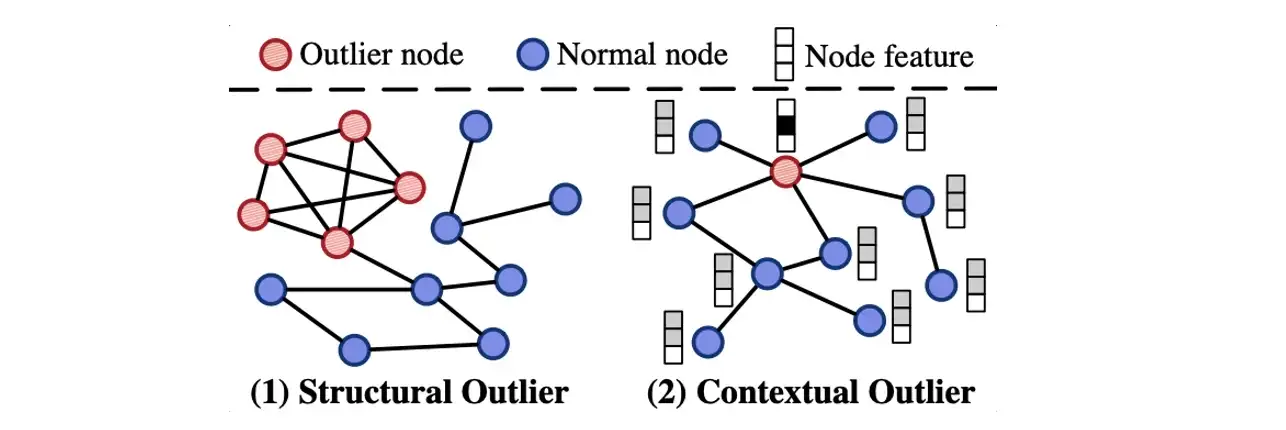

In [94]:
!pip install pygod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygod: filename=pygod-0.3.1-py3-none-any.whl size=76492 sha256=9dd0d645a9e699d4362166c87958a1b8b1cf01283cb7cf8b555c7daaf7d36f88
  Stored in directory: /root/.cache/pip/wheels/01/21/16/7d56f68f9b8fe255f8a59a34c2a232f054491b407c56727bb8
Successfully built pygod


In [95]:
from pygod.utils import load_data
import numpy as np

graph = load_data('inj_cora')

"""
0: inlier
1: contextual outlier only
2: structural outlier only
3: both contextual outlier and structural outlier
"""

np.unique(graph.y.tolist(), return_counts = 1)

(array([0, 1, 2, 3]), array([2570,   68,   68,    2]))

In [96]:
from pygod.models import DOMINANT
from sklearn.metrics import roc_auc_score, average_precision_score

def train_anomaly_detector(model, graph):
    return model.fit(graph)

def eval_anomaly_detector(model, graph):

    outlier_scores = model.decision_function(graph)
    auc = roc_auc_score(graph.y.numpy(), outlier_scores)
    # ap = average_precision_score(graph.y.numpy(), outlier_scores)
    print(f'AUC Score: {auc:.3f}')
    # print(f'AP Score: {ap:.3f}')


graph.y = graph.y.bool()
model = DOMINANT()
model = train_anomaly_detector(model, graph)
eval_anomaly_detector(model, graph)

AUC Score: 0.841
